In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.datasets import make_blobs

In [15]:
n = 10000
centres = [(0.9,0.05),(0.05,0.94)]
X,y = make_blobs(n,n_features=2,cluster_std=0.4,centers=centres,shuffle=False,random_state=42)

In [16]:
features = []
labels = []

for feature,label in zip(X,y):
    if(feature[0] >= 0 and feature[0] <= 1.0 and feature[1] >= 0 and feature[1] <= 1.0):
        features.append(feature)
        labels.append(label)

In [17]:
X = np.array(features)
y = np.array(labels)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


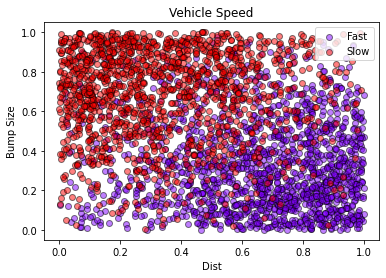

In [18]:
plt.figure()
y_unique = np.unique(y)
class_names = ['Fast','Slow']
colors = cm.rainbow(np.linspace(0.0,1.0,y_unique.size))

for this_y, color in zip(y_unique,colors):
    this_X = X[y == this_y]
    plt.scatter(this_X[:,0],this_X[:,1],c=color,alpha=0.5,edgecolors='k',label=class_names[this_y])
plt.legend(loc="best")
plt.xlabel("Dist")
plt.ylabel("Bump Size")
plt.title("Vehicle Speed")
plt.show()


In [19]:
from sklearn import datasets, svm

C = 1.0
svc = svm.SVC(kernel='linear',C=1.0).fit(X,y)

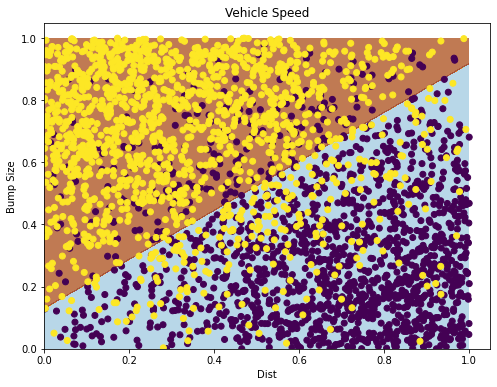

In [36]:
def predplot(clf):
    xx,yy = np.meshgrid(np.arange(0,1.0,0.001),np.arange(0,1.0,0.001))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])

    plt.figure(figsize=(8,6))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.8)

    plt.scatter(X[:,0],X[:,1],c=y.astype(np.float))

    plt.xlabel("Dist")
    plt.ylabel("Bump Size")
    plt.title("Vehicle Speed")
    plt.show()

predplot(svc)

In [28]:
#svc.predict(Bump Size, Distance)
print(svc.predict([[1.0,0.2]]))

[0]


In [30]:
from sklearn.model_selection import cross_val_score

fold_scores = cross_val_score(svc,X,y,cv=10)
print(fold_scores)
print(np.mean(fold_scores))

[0.86885246 0.87213115 0.83934426 0.84262295 0.84590164 0.83278689
 0.8295082  0.83552632 0.84210526 0.82236842]
0.8431147540983606


In [37]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

param_grid= dict(gamma = [0,0.5,1.0,2.0,3.0,10.0,1000.0])
grid = GridSearchCV(svm.SVC(kernel='rbf'),param_grid=param_grid,cv=100)
grid.fit(X,y)

print("best ",grid.best_params_,grid.best_score_)

best  {'gamma': 0.5} 0.8423440860215052
